## Setting

In [3]:
import os

current_dir = os.getcwd()
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'final')

In [4]:
import nest_asyncio

nest_asyncio.apply()

In [5]:
from dotenv import load_dotenv

load_dotenv()

# import os

# os.environ["OPENAI_API_KEY"] = "..."

True

# 문서 선정 및 기본 전처리

## 1. 원본 문서 다운로드

https://www.koreabaseball.com/Kbo/Board/Ebook/EbookYear.aspx

- 2024 리그 규약
- 2024 리그 규정
- 2024 야구 규칙

## 2. Data Cleaning

### 필요 없는 페이지 지우기

https://www.ilovepdf.com/ko/remove-pages

### [리그 규약]
- 1-7,10-38,111-266

### [리그 규정]

- 1-11,99-102

### [야구 규칙]

- 1-4,6-22,210-212
- 그림: 6-18

# 파싱

## 1. 기본 파싱

### 1-1. 텍스트 파싱 테스트

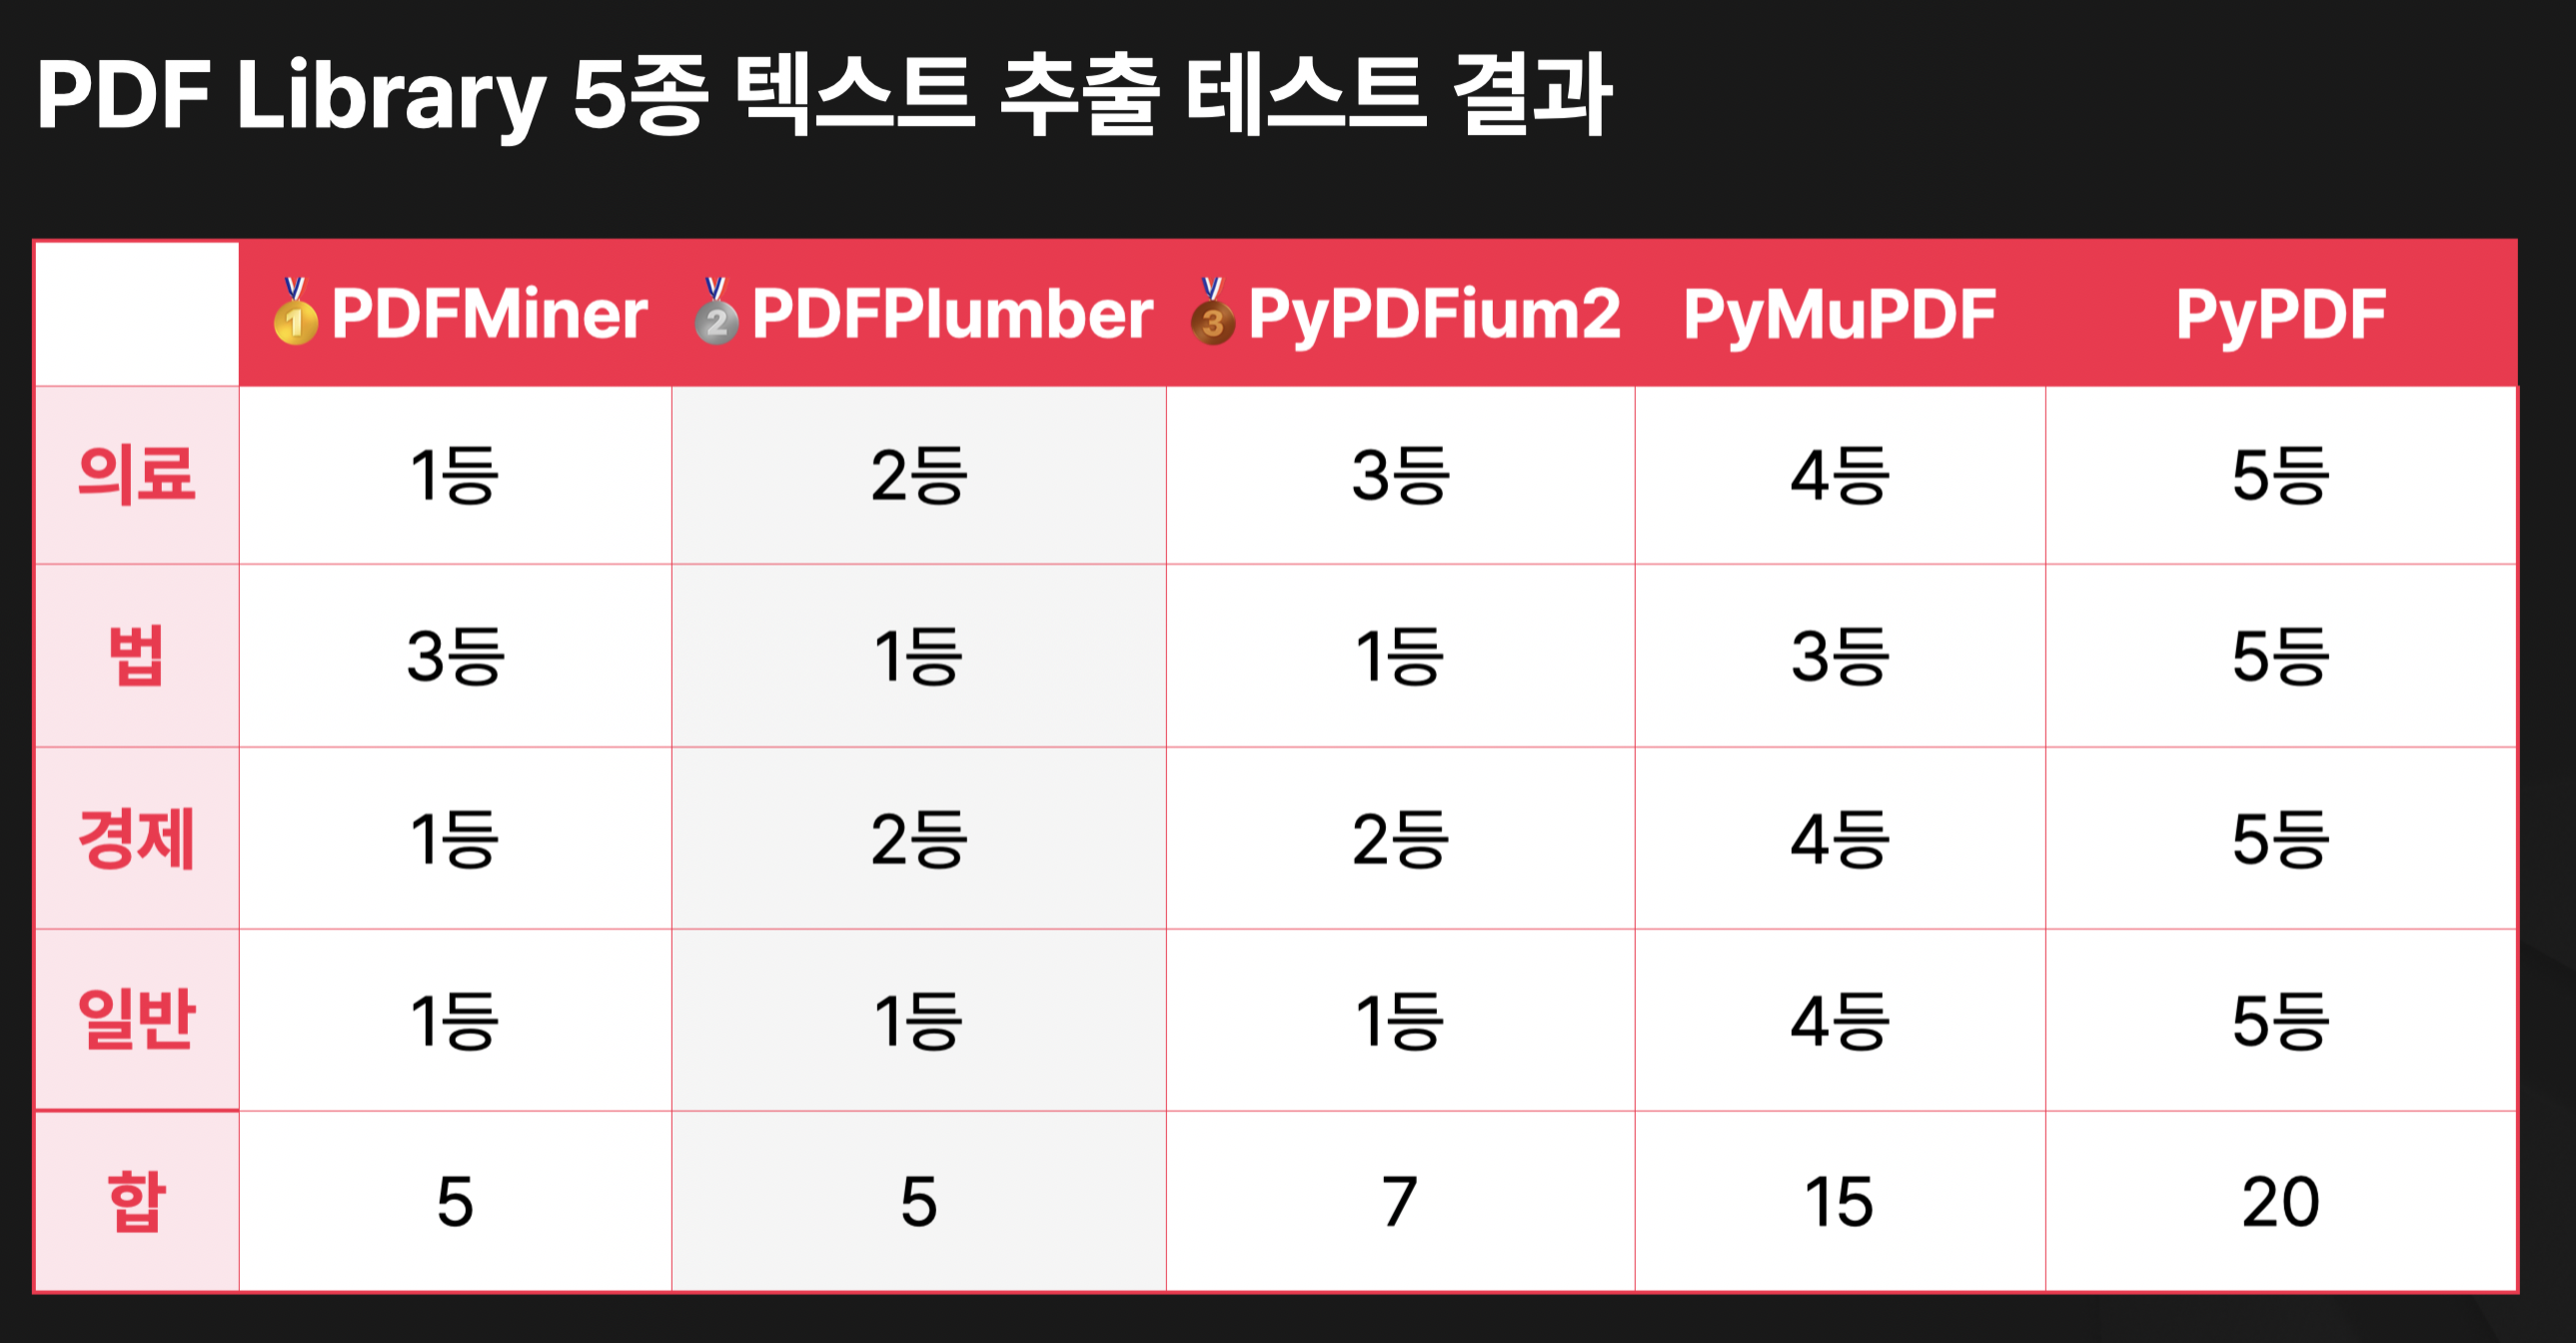

In [19]:
from IPython.display import Image

pdf_library_img_dir = os.path.join(root_dir, 'img', 'pdf_library.png')
Image(pdf_library_img_dir)

In [14]:
text_dir = os.path.join(data_dir, 'test', 'text_test.pdf')

#### 1. PDFMiner



In [13]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer

def extract_text_by_page(pdf_path):
    for page_layout in extract_pages(pdf_path):
        page_text = ""
        for element in page_layout:
            if isinstance(element, LTTextContainer):
                page_text += element.get_text()
        yield page_text
        
pdfminer_result = [page for page in extract_text_by_page(text_dir)]

In [15]:
print(pdfminer_result[0])

제1장  총  칙 
제1조 [목적]    KBO  규약은  한국야구위원회(이하  “KBO”라  한다)의 
정관에  따라  KBO가  주관하는  모든  리그(KBO  리그와  KBO  퓨처
스리그를  말하며,  이하  “리그”라  한다)의  운영에  관한  사항을  규
정함을  목적으로  한다. 
제2조 [권리와 의무]  KBO의 회원(이하 “회원”이라 한다), 회원 소
속의  임직원ㆍ감독ㆍ코치ㆍ선수,  심판위원,  기록위원  등  리그에 
참가하는  모든  단체  및  개인(이하  총칭하여  “리그  관계자”라  한
다)은 KBO 규약이 보호하는 평등한  권리를 가지며 또한 KBO 규
약과  이에  부속하는  제반  규정  및  KBO  규약에  따른  총재의  결정
을  성실히  준수할  의무를  갖는다.
제2장  총  재 
제3조 [직무]   
①  총재는  KBO를  대표하고  이를  관리  및  통할한다. 
②  총재는  직무수행을  위하여  필요한  경우 총재  산하에  특별위원
회를  설치할  수  있다. 
③  총재는  리그를  관리하고  KBO로  하여금  이를  주최하게  한다. 
[1991.2.12  개정]
제4조 [지시, 재정, 조사 및 재결]
① 총재는 리그의 발전과 KBO의 권익을 보호하기 위하여 리그 관
계자에게  필요한  지시를  내릴  수  있다. 
② 총재는 리그 관계자 사이에 분쟁이 있는 경우 사정을 청취하여 
중재할  수  있는  재정  권한을  가진다.  재정  절차는  제16장에서  정
한  바에  따른다.
③ 총재는 리그 관계자의 유해행위 기타 KBO 규약 위반사항 조사
29



#### 2. PDFPlumber

In [18]:
import pdfplumber
    
pdf = pdfplumber.open(text_dir)
pages = pdf.pages
pdfplumber_result = [page.extract_text() for page in pages]

print(pdfplumber_result[0])

제1장 총 칙
제1조 [목적] KBO 규약은 한국야구위원회(이하 “KBO”라 한다)의
정관에 따라 KBO가 주관하는 모든 리그(KBO 리그와 KBO 퓨처
스리그를 말하며, 이하 “리그”라 한다)의 운영에 관한 사항을 규
정함을 목적으로 한다.
제2조 [권리와 의무] KBO의 회원(이하 “회원”이라 한다), 회원 소
속의 임직원ㆍ감독ㆍ코치ㆍ선수, 심판위원, 기록위원 등 리그에
참가하는 모든 단체 및 개인(이하 총칭하여 “리그 관계자”라 한
다)은 KBO 규약이 보호하는 평등한 권리를 가지며 또한 KBO 규
약과 이에 부속하는 제반 규정 및 KBO 규약에 따른 총재의 결정
을 성실히 준수할 의무를 갖는다.
제2장 총 재
제3조 [직무]
① 총재는 KBO를 대표하고 이를 관리 및 통할한다.
② 총재는 직무수행을 위하여 필요한 경우 총재 산하에 특별위원
회를 설치할 수 있다.
③ 총재는 리그를 관리하고 KBO로 하여금 이를 주최하게 한다.
[1991.2.12 개정]
제4조 [지시, 재정, 조사 및 재결]
① 총재는 리그의 발전과 KBO의 권익을 보호하기 위하여 리그 관
계자에게 필요한 지시를 내릴 수 있다.
② 총재는 리그 관계자 사이에 분쟁이 있는 경우 사정을 청취하여
중재할 수 있는 재정 권한을 가진다. 재정 절차는 제16장에서 정
한 바에 따른다.
③ 총재는 리그 관계자의 유해행위 기타 KBO 규약 위반사항 조사
29


#### 3. PyPDFium2

In [19]:
from langchain_community.document_loaders import PyPDFium2Loader

loader = PyPDFium2Loader(text_dir)
load = loader.load()
pypdfium2_result = [page.page_content for page in load]

print(pypdfium2_result[0])

29
제1장 총 칙 
제1조 [목적] KBO 규약은 한국야구위원회(이하 “KBO”라 한다)의 
정관에 따라 KBO가 주관하는 모든 리그(KBO 리그와 KBO 퓨처
스리그를 말하며, 이하 “리그”라 한다)의 운영에 관한 사항을 규
정함을 목적으로 한다. 
제2조 [권리와 의무] KBO의 회원(이하 “회원”이라 한다), 회원 소
속의 임직원ㆍ감독ㆍ코치ㆍ선수, 심판위원, 기록위원 등 리그에 
참가하는 모든 단체 및 개인(이하 총칭하여 “리그 관계자”라 한
다)은 KBO 규약이 보호하는 평등한 권리를 가지며 또한 KBO 규
약과 이에 부속하는 제반 규정 및 KBO 규약에 따른 총재의 결정
을 성실히 준수할 의무를 갖는다.
제2장 총 재 
제3조 [직무] 
① 총재는 KBO를 대표하고 이를 관리 및 통할한다. 
② 총재는 직무수행을 위하여 필요한 경우 총재 산하에 특별위원
회를 설치할 수 있다. 
③ 총재는 리그를 관리하고 KBO로 하여금 이를 주최하게 한다. 
[1991.2.12 개정]
제4조 [지시, 재정, 조사 및 재결]
① 총재는 리그의 발전과 KBO의 권익을 보호하기 위하여 리그 관
계자에게 필요한 지시를 내릴 수 있다. 
② 총재는 리그 관계자 사이에 분쟁이 있는 경우 사정을 청취하여 
중재할 수 있는 재정 권한을 가진다. 재정 절차는 제16장에서 정
한 바에 따른다.
③ 총재는 리그 관계자의 유해행위 기타 KBO 규약 위반사항 조사



/Users/kimbwook/PycharmProjects/fast-campus/venv/lib/python3.10/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


"PyPDFium2"로 결정 

### 1-2. 표 파싱 테스트

In [6]:
table_dir = os.path.join(data_dir, 'test', 'table_test.pdf')

#### 1. LlamaParse

In [22]:
from llama_parse import LlamaParse

parse_instance = LlamaParse(result_type="markdown", language="ko")

In [23]:
table_result = parse_instance.load_data(table_dir)

Started parsing the file under job_id 88db7621-8ac8-4c94-8769-d3bf5f4c19ab


In [26]:
print(table_result[0].text)

# 2024년 공식야구규칙 변경 요약사항

|구분|변경 전|변경 후|
|---|---|---|
|각 루(1, 2, 3루)|<추가>|베이스 크기 15인치(38.1cm) KBO에서는 18인치(45.72cm) 사용|
|수비위치|<추가>|수비 시프트 제한 (KBO만 적용)|
|선수교체·마운드 방문|<추가>|투수 세 타자 상대 (KBO 퓨처스리그만 적용)|
|<추가>|선수교체·마운드 방문이닝 처음에 파울 라인을 넘어서면,|그 투수는 첫 번째 타자가 아웃되거나 발생의 위험이 있다고 심판진이 인정할 경우는 제외|


마크다운 뷰어: https://markdownlivepreview.com/

#### 2. Upstage Document Parser

In [13]:
from dotenv import load_dotenv

load_dotenv()

# 뒤늦게 추가하는 분들은 restart Kernel을 혹은 주피터 재시작을 해주세요.

# os.environ["UPSTAGE_API_KEY"] = "YOUR_API_KEY"

True

In [9]:
from langchain_upstage import UpstageDocumentParseLoader

layzer = UpstageDocumentParseLoader(table_dir, split="page")

In [10]:
docs = layzer.load()

In [12]:
print(docs[0].page_content)

<h1 id='0' style='font-size:18px'>2024년 공식야구규칙 변경 요약사항</h1> <table id='1' style='font-size:14px'><tr><td>구분</td><td>변경 전</td><td>변경 후</td></tr><tr><td>각 루(1, 2, 3루) 2.03</td><td>베이스 크기 15인치(38.1cm)</td><td><추가> KBO에서는 18인치(45.72cm) 사용</td></tr><tr><td>수비위치 5.02(c)</td><td>-</td><td><추가> 수비 시프트 제한 (KBO만 적용)</td></tr><tr><td>선수교체·마운드 방문 5.10(g)</td><td>-</td><td><추가> 투수 세 타자 상대 (KBO 퓨처스리그만 적용)</td></tr><tr><td>선수교체·마운드 방문 5.10⒤</td><td>이닝 처음에 파울 라인을 넘어서면, 그 투수는 첫 번째 타자가 아웃되거나 1루에 나갈 때까지 투구</td><td><추가> 우천 등 경기 중단 후 재개로 부상 발생의 위험이 있다고 심판진이 인정할 경우는 제외</td></tr></table>


html 뷰어: https://html.onlineviewer.net/

"Upstage Document Parser"로 결정 (광고 X)

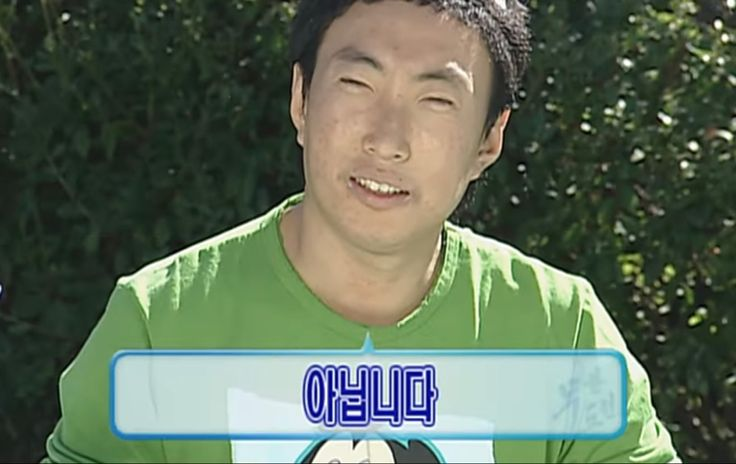

In [20]:
no_img_dir = os.path.join(root_dir, 'img', 'No.jpg')
Image(no_img_dir)

### 1-3. 파싱 (w/ 하이브리드 파서 & AutoRAG)

(참고)
Upstage API 비용: ~$ (10$ 무료 크레딧 있는 분들은 걱정 없이 사용하세요)

In [16]:
glob_path = os.path.join(data_dir, 'cleaned', '*')

In [17]:
from autorag.parser import Parser

project_dir = os.path.join(root_dir, 'autorag_project', 'final', 'parse')
parser = Parser(data_path_glob=glob_path, project_dir=project_dir)

[01/27/25 17:01:28] INFO     [__init__.py:100] >> You are using API version of AutoRAG.To use local ]8;id=499600;file:///Users/kimbwook/PycharmProjects/fast-campus/venv/lib/python3.10/site-packages/autorag/__init__.py\__init__.py]8;;\:]8;id=345524;file:///Users/kimbwook/PycharmProjects/fast-campus/venv/lib/python3.10/site-packages/autorag/__init__.py#100\100]8;;\
                             version, run pip install 'AutoRAG[gpu]'                                               

                    INFO     [__init__.py:128] >> You are using API version of AutoRAG.To use local ]8;id=79676;file:///Users/kimbwook/PycharmProjects/fast-campus/venv/lib/python3.10/site-packages/autorag/__init__.py\__init__.py]8;;\:]8;id=613989;file:///Users/kimbwook/PycharmProjects/fast-campus/venv/lib/python3.10/site-packages/autorag/__init__.py#128\128]8;;\
                             version, run pip install 'AutoRAG[gpu]'                                               

In [ ]:
yaml_path = os.path.join(root_dir, 'config', 'final', 'parse.yaml')
parser.start_parsing(yaml_path)

### 2. 그림 파싱

#### 2-1. 그림 파싱 테스트

#### 2-2. 그림 파싱

### 3. 파싱 결과 확인

# 청킹